In [1]:
#Create ipynb file that:
#1. Imports required packages (you choose)
#2. Imports data from stash 'https://stash.danskenet.net/users/bb6586/repos/dsaeda2020q1/browse/CSI_data_final.csv'
#3. Draw distributions for all numeric variables in data set (comment if it looks normal/bernouli or not)
#4. Plot age histogram + normalized age histogram + standardized age histogram
#5. Calculate statistics for monthly_income, does it look normal?

#Importing the packages
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#importing data from stash
data = pd.read_csv ('https://raw.githubusercontent.com/olhamk/Exploratory_Data_Science_with_Python/master/CSI_data_final.csv?raw')

In [3]:
data.head()

,Unnamed: 0,default,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,monthlyincome,phone
0,1,0,< 0 EUR,6,critical,furniture/appliances,1169,unknown,> 7 years,4,67,none,own,2,skilled,1,1740,1
1,2,1,1 - 200 EUR,48,good,furniture/appliances,5951,< 100 EUR,1 - 4 years,2,22,none,own,1,skilled,1,4963,0
2,3,0,unknown,12,critical,education,2096,< 100 EUR,4 - 7 years,3,49,none,own,1,unskilled,2,1214,0
3,4,0,< 0 EUR,42,good,furniture/appliances,7882,< 100 EUR,4 - 7 years,4,45,none,other,1,skilled,2,7077,0
4,5,1,< 0 EUR,24,poor,car,4870,< 100 EUR,1 - 4 years,4,53,none,other,2,skilled,2,5771,0


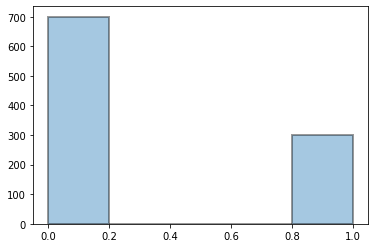

In [4]:
#1 distributions for all numeric variables

#"Default" distribution 

sns.distplot(pd.DataFrame(data, columns = ['default']), kde=False, hist_kws=dict(edgecolor='black', linewidth=2))
#The chart below shows that we have a Bernoulli Distribution

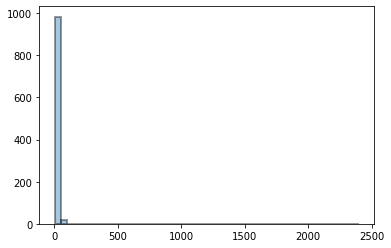

In [5]:
#"months_loan_duration" distribution

sns.distplot(pd.DataFrame(data, columns = ['months_loan_duration']), kde=False, hist_kws=dict(edgecolor='black', linewidth=2))

#from the distribution below it seems that there may be some outliers

In [6]:
#sorting the data from largest to smallest to identify an outlier
data.nlargest(10, 'months_loan_duration')

,Unnamed: 0,default,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,monthlyincome,phone
962,963,0,unknown,2400,good,car,3556,unknown,1 - 4 years,2,29,none,own,1,skilled,1,2681,0
677,678,1,1 - 200 EUR,72,good,furniture/appliances,5595,100 - 500 EUR,1 - 4 years,2,24,none,own,1,skilled,1,5130,0
29,30,1,< 0 EUR,60,poor,business,6836,< 100 EUR,> 7 years,4,63,none,own,2,skilled,1,6141,1
134,135,0,unknown,60,good,NaN,10144,100 - 500 EUR,4 - 7 years,4,21,none,own,1,skilled,1,9644,1
255,256,0,1 - 200 EUR,60,poor,NaN,7418,unknown,1 - 4 years,1,27,none,own,1,unskilled,1,7822,0
332,333,1,1 - 200 EUR,60,good,NaN,7408,100 - 500 EUR,< 1 year,2,24,none,own,1,management,1,7606,0
373,374,0,unknown,60,critical,NaN,13756,unknown,> 7 years,4,63,bank,other,1,management,1,14567,1
374,375,1,1 - 200 EUR,60,very good,NaN,14782,100 - 500 EUR,> 7 years,4,60,bank,other,2,management,1,15663,1
616,617,0,1 - 200 EUR,60,poor,furniture/appliances,9157,unknown,1 - 4 years,2,27,none,other,1,management,1,9170,0
637,638,0,unknown,60,poor,furniture/appliances,15653,< 100 EUR,4 - 7 years,4,21,none,own,2,skilled,1,16077,1


In [7]:
#dropping a row that contains an outlier (a value of 2400 in this case)
data.drop(data[data['months_loan_duration'] == 2400].index, inplace = True)

(0.899905800819397, 5.198770366072077e-25)

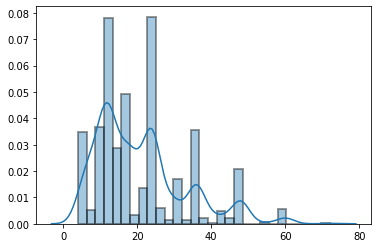

In [8]:
#"months_loan_duration" distribution without the outlier
sns.distplot(pd.DataFrame(data, columns = ['months_loan_duration']), hist_kws=dict(edgecolor='black', linewidth=2))
#the chart below shows a distribution that is rather non-normal

stats.shapiro(pd.DataFrame(data, columns = ['months_loan_duration'])) 
#Shapiro-Wilk test returns the p-value of 0, which also suggests that the data isn't normally distributed

(0.7952449917793274, 1.1658636541756951e-33)

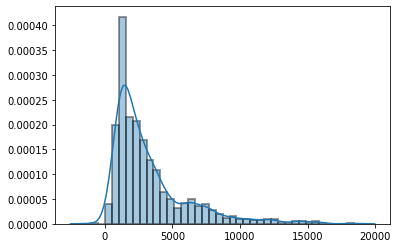

In [9]:
#"amount" distribution

sns.distplot(pd.DataFrame(data, columns = ['amount']), hist_kws=dict(edgecolor='black', linewidth=2))

#this chart also shows a non-normal distribution, which looks more like a right-skewed distribution

stats.shapiro(pd.DataFrame(data, columns = ['amount']))
#Shapiro-Wilk test returns a p-value, which is less than 0.5. 
#That also suggests that the data is not normally distributed.

(0.8134707808494568, 1.862025369499133e-32)

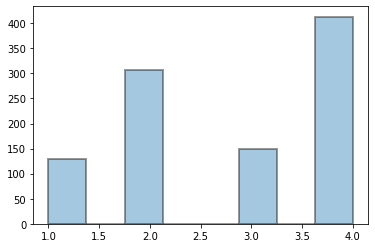

In [10]:
#"years_at_residence" distribution

sns.distplot(pd.DataFrame(data, columns = ['years_at_residence']), kde=False, hist_kws=dict(edgecolor='black', linewidth=2))
stats.shapiro(pd.DataFrame(data, columns = ['years_at_residence']))

#The distribution does not seem to be normal, and so says the p-value of Shapiro-Wilk test

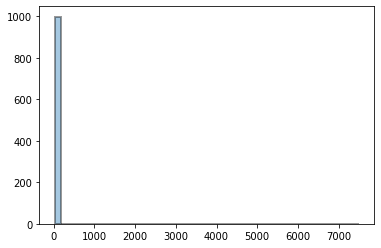

In [11]:
#"age" distribution - it seems that there are some outliers
sns.distplot(pd.DataFrame(data, columns = ['age']), kde=False, hist_kws=dict(edgecolor='black', linewidth=2))

In [12]:
#identifying the outliers
data.nlargest(10, 'age')

,Unnamed: 0,default,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,monthlyincome,phone
7,8,0,1 - 200 EUR,36,good,car,6948,< 100 EUR,1 - 4 years,2,7500,none,rent,1,management,1,6292,1
330,331,0,< 0 EUR,24,critical,NaN,6615,< 100 EUR,unemployed,4,75,none,other,2,management,1,5686,1
536,537,0,< 0 EUR,6,good,car,1374,unknown,unemployed,3,75,none,own,1,management,1,2264,1
186,187,1,1 - 200 EUR,9,very good,NaN,5129,< 100 EUR,> 7 years,4,74,bank,other,1,management,2,6063,1
430,431,0,unknown,5,good,NaN,3448,< 100 EUR,4 - 7 years,4,74,none,own,1,unskilled,1,3742,0
606,607,0,unknown,24,critical,business,4526,< 100 EUR,1 - 4 years,2,74,none,own,1,management,1,4600,1
756,757,0,> 200 EUR,6,critical,car,1299,< 100 EUR,1 - 4 years,1,74,none,own,3,unemployed,2,2267,0
163,164,0,1 - 200 EUR,10,good,NaN,7308,< 100 EUR,unemployed,4,70,bank,other,1,management,1,7127,1
187,188,0,1 - 200 EUR,16,critical,NaN,1175,< 100 EUR,unemployed,3,68,none,other,3,unemployed,1,192,1
846,847,1,unknown,18,good,car,6761,unknown,1 - 4 years,4,68,none,rent,2,skilled,1,5849,0


In [13]:
#dropping the age values that are larger than 150 
data.drop(data[data['age'] > 150].index, inplace = True)

(0.9175940155982971, 6.975782757810331e-23)

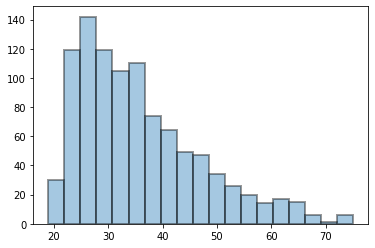

In [14]:
#"age" distribution without the outlier
sns.distplot(pd.DataFrame(data, columns = ['age']), kde=False, hist_kws=dict(edgecolor='black', linewidth=2))
stats.shapiro(pd.DataFrame(data, columns = ['age']))

#the chart below shows a right-skewed distribution as the data is not normally distributed 
#(we can see that visually and the p-value of Shapiro-Wilk test also confirms that)

(0.6604220271110535, 1.4190669288524558e-40)

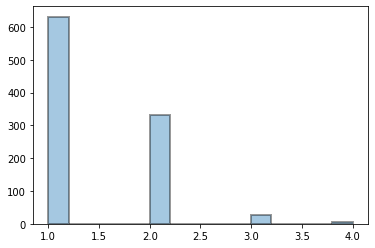

In [15]:
#"existing_loans_count" distribution

sns.distplot(pd.DataFrame(data, columns = ['existing_loans_count']), kde=False, hist_kws=dict(edgecolor='black', linewidth=2))
stats.shapiro(pd.DataFrame(data, columns = ['existing_loans_count'])) #the test also shows that p-value is less than 0.5
#we can see that the data is not normally distributed

(0.6604220271110535, 1.4190669288524558e-40)

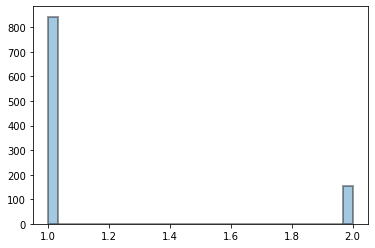

In [16]:
#"dependents" distribution
sns.distplot(pd.DataFrame(data, columns = ['dependents']), kde=False, hist_kws=dict(edgecolor='black', linewidth=2))
stats.shapiro(pd.DataFrame(data, columns = ['existing_loans_count'])) #p-value is less than 0.5 here as well
#we can visually see that the distribution is not normal

(0.8283507823944092, 2.1754584779057773e-31)

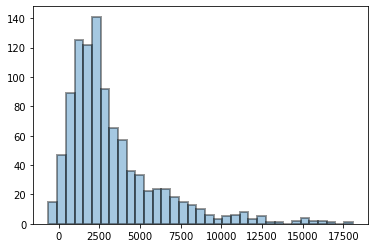

In [17]:
#"monthlyincome" distribution
sns.distplot(pd.DataFrame(data, columns = ['monthlyincome']), kde=False, hist_kws=dict(edgecolor='black', linewidth=2))
stats.shapiro(pd.DataFrame(data, columns = ['monthlyincome'])) #not normal distribution (p-value is less than 0.5)
#that looks like a right-skewed distribution

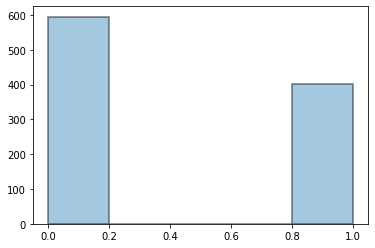

In [18]:
#"phone" distribution

sns.distplot(pd.DataFrame(data, columns = ['phone']), kde=False, hist_kws=dict(edgecolor='black', linewidth=2))
#this chart looks like a Bernoulli Distribution

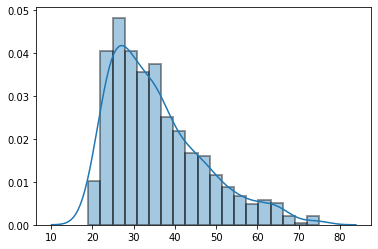

In [19]:
#2 age histogram + normalized age histogram + standardized age histogram

#Regular age histogram

sns.distplot(pd.DataFrame(data, columns = ['age']), hist_kws=dict(edgecolor='black', linewidth=2))


In [20]:
#Standardized histogram

from sklearn.preprocessing import StandardScaler #importing StandardScaler to remove the mean and scale the data
scaler1 = StandardScaler() 
stand_data_scaled = scaler1.fit_transform(pd.DataFrame(data, columns = ['age'])) #scaling "age" column

In [21]:
#Checking the mean, standard deviation, min and max values of scaled data
print('Mean (age): ',stand_data_scaled.mean(axis=0))
print('Std (age): ',stand_data_scaled.std(axis=0))
print('Min value (age): ', stand_data_scaled.min(axis=0))
print('Max value (age): ', stand_data_scaled.max(axis=0))

Mean (age):  [-8.89958336e-17]
Std (age):  [1.]
Min value (age):  [-1.45467277]
Max value (age):  [3.46655918]


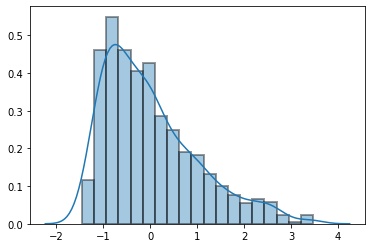

In [22]:
#plotting standardized histogram
sns.distplot(stand_data_scaled, hist_kws=dict(edgecolor='black', linewidth=2))

In [23]:
#Normalized histogram 

from sklearn.preprocessing import MinMaxScaler #importing MinMaxScalar to scale the data to a range from 0 to 1
scaler2 = MinMaxScaler() 
norm_data_scaled = scaler2.fit_transform(pd.DataFrame(data, columns = ['age'])) #scaling the data in "age column"

In [24]:
##Checking the mean, standard deviation, min and max values of scaled data
print('Mean (age): ', norm_data_scaled.mean(axis=0))
print('Std (age): ', norm_data_scaled.std(axis=0))
print('Min (age): ', norm_data_scaled.min(axis=0))
print('Max (age): ', norm_data_scaled.max(axis=0))

Mean (age):  [0.29559118]
Std (age):  [0.20320115]
Min (age):  [0.]
Max (age):  [1.]


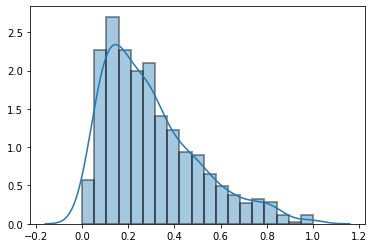

In [25]:
##plotting normalized histogram
sns.distplot(norm_data_scaled, hist_kws=dict(edgecolor='black', linewidth=2))

In [26]:
#3 statistics of "monthly income"

x = pd.DataFrame(data, columns = ['monthlyincome'])
x.describe()

#Here we can see that we have a sample of 998 variables ranging from -630 to 18078 . Initially, there were 1000 variables but 2 rows were dropped earlier. 
#25th percentile has a value 1409,5 and 75th percentile equals 4127. The median (50th percentile) equals 2386.
#The standard deviation is 2873.28,and the mean is 3264.38. That indicates that most of the income falls between the values of 391 and 6137. 
#The boxplot in the cell below also shows that we have a lot of outliers. 
#Overall, we have monthly income that ranges from very low (negative) values to very high values. 
#The fact that we have negative monthly income seems to be rather unusual. 

,monthlyincome
count,998.000000
mean,3264.379760
std,2873.280954
min,-630.000000
25%,1409.500000
50%,2386.000000
75%,4127.000000
max,18078.000000


[12277, 14709, 12325, 16251, 12316, 15056, 14567, 15663, 15295, 12321, 12502, 12160, 11911, 16077, 13374, 14900, 11985, 15296, 16538, 18078, 15877, 12905]


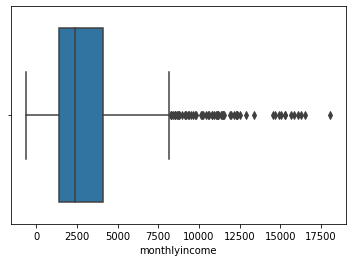

In [27]:
#3 printing out the boxplot to check the outliers

sns.boxplot(x=data['monthlyincome'])

#printing out the outliers 
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(data['monthlyincome'])
print(outlier_datapoints)

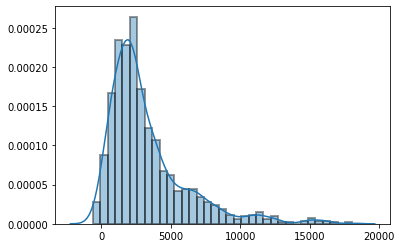

In [28]:
#plotting monthly income distribution once again 
sns.distplot(pd.DataFrame(data, columns = ['monthlyincome']), hist_kws=dict(edgecolor='black', linewidth=2))
